# Part 1 - Dataset Review
In this notebook, we review the dataset.

[Consumer Reviews of Amazon Products](https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/data) | Concensed, used for this project

[Amazon Product Reviews](https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews) | Large

## Imports

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm
tqdm.pandas()

SEP = 100 * '-'  # print separator

## Load dataset
Let's have a look at the dataset contents

In [40]:
# load dataset to a dataframe
dataset_paths = [
    'dataset/1429_1.csv',
    'dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv',
    'dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'
]

data = pd.DataFrame() 

for path in dataset_paths:
    df = pd.read_csv(path, low_memory=False)
    data = pd.merge(data, df, how='outer') if not data.empty else df

# pickle raw dataset
data.to_pickle('pickle/raw_dataset.pkl')

# print dataset shape
print('Rows/columns: ', data.shape)
print(SEP)

# print dataset columns names
print('Column names: ', data.columns)
print(SEP)

# print dataset first 10 rows
data.head(10)

Rows/columns:  (67992, 27)
----------------------------------------------------------------------------------------------------
Column names:  Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'dateAdded', 'dateUpdated',
       'primaryCategories', 'imageURLs', 'manufacturerNumber', 'sourceURLs'],
      dtype='object')
----------------------------------------------------------------------------------------------------


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,dateAdded,dateUpdated,primaryCategories,imageURLs,manufacturerNumber,sourceURLs
0,AV-ETMhgYSSHbkXwpNb9,All-New Kindle Oasis E-reader - 7 High-Resolut...,B06VTJWRJW,Amazon,"Featured Brands,E-Readers & Accessories,EBook ...","amazon/53006390,amazon/b06vtjwrjw,841667188416...",Amazon,2017-11-04T00:00:00.000Z,NaN,2018-05-26T00:00:00Z,...,Great device for reading. Definately pricey.,NaN,NaN,MiketheD,2017-11-03T23:17:55Z,2019-02-25T02:27:15Z,"Electronics,Media",https://pisces.bbystatic.com/image2/BestBuy_US...,53-006390,"https://www.barcodable.com/upc/841667188416,ht..."
1,AV-ETMhgYSSHbkXwpNb9,All-New Kindle Oasis E-reader - 7 High-Resolut...,B06VTJWRJW,Amazon,"Featured Brands,E-Readers & Accessories,EBook ...","amazon/53006390,amazon/b06vtjwrjw,841667188416...",Amazon,2017-11-10T00:00:00.000Z,NaN,2018-05-26T00:00:00Z,...,Excellent Kindle,NaN,NaN,DonA,2017-11-03T23:17:55Z,2019-02-25T02:27:15Z,"Electronics,Media",https://pisces.bbystatic.com/image2/BestBuy_US...,53-006390,"https://www.barcodable.com/upc/841667188416,ht..."
2,AV-ETMhgYSSHbkXwpNb9,All-New Kindle Oasis E-reader - 7 High-Resolut...,B06VTJWRJW,Amazon,"Featured Brands,E-Readers & Accessories,EBook ...","amazon/53006390,amazon/b06vtjwrjw,841667188416...",Amazon,2017-12-20T00:00:00.000Z,NaN,2018-05-26T00:00:00Z,...,Love it,NaN,NaN,puglover,2017-11-03T23:17:55Z,2019-02-25T02:27:15Z,"Electronics,Media",https://pisces.bbystatic.com/image2/BestBuy_US...,53-006390,"https://www.barcodable.com/upc/841667188416,ht..."
3,AV-ETMhgYSSHbkXwpNb9,All-New Kindle Oasis E-reader - 7 High-Resolut...,B06VTJWRJW,Amazon,"Featured Brands,E-Readers & Accessories,EBook ...","amazon/53006390,amazon/b06vtjwrjw,841667188416...",Amazon,2017-12-23T00:00:00.000Z,NaN,2018-05-26T00:00:00Z,...,Good kindle,NaN,NaN,Bitis13,2017-11-03T23:17:55Z,2019-02-25T02:27:15Z,"Electronics,Media",https://pisces.bbystatic.com/image2/BestBuy_US...,53-006390,"https://www.barcodable.com/upc/841667188416,ht..."
4,AV-EVZITKZqtpbFMSoqc,All-New Kindle Oasis E-reader - 7 High-Resolut...,B06XD5YCKX,Amazon,"EBook Readers,Tablets,Electronics,Amazon Eread...","841667176819,amazon/53051929,amazonkindleoasis...",Amazon,2017-11-15T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,...,"So much to love, but slippery",NaN,NaN,sdross1968,2017-11-03T23:17:55Z,2019-02-25T02:05:55Z,"Electronics,Media",https://target.scene7.com/is/image/Target/5305...,53-006476,https://www.newegg.com/Product/Product.aspx%25...
5,AV-EVZITKZqtpbFMSoqc,All-New Kindle Oasis E-reader - 7 High-Resolut...,B06XD5YCKX,Amazon,"EBook Readers,Tablets,Electronics,Amazon Eread...","841667176819,amazon/53051929,amazonkindleoasis...",Amazon,2017-12-09T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,...,Expensive but nice,NaN,NaN,mar1saaaa,2017-11-03T23:17:55Z,2019-02-25T02:05:55Z,"Electronics,Media",https://target.scene7.com/is/image/Target/5305...,53-006476,https://www.newegg.com/Product/Product.aspx%25...
6,AV-EVZITKZqtpbFMSoqc,All-New Kindle Oasis E-reader - 7 High-Resolut...,B06XD5YCKX,Amazon,"EBook Readers,Tablets,Electronics,Amazon Eread...","841667176819,amazon/53051929,amazonkindleoasis...",Amazon,2017-12-10T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,...,Like it,NaN,NaN,kcladyz,2017-11-03T23:17:55Z,2019-02-25T02:05:55Z,"Electronics,Media",https://target.scene7.com/is/image/Target/5305...,53-006476,https://www.newegg.com/Product/Product.aspx%25...
7,AV-EVZITKZqtpbFMSoqc,All-New Kindle Oasis E-reader - 7 High-Resolut...,B06XD5YCKX,Amazon,"EBook Readers,Tablets,Electronics,Amazon Eread...","841667176819,amazon/53051929,amazonkindleoasis...",Amazon,2017-12-16T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,...,Love it!,NaN,NaN,Janvib0311,2017-11-03T23:17:55Z,2019-02-25T02:05:55Z,"Electronics,Media",https://target.scene7.com/is/image/Target/5305...,53-006476,https://www.newegg.com/Product/Product.aspx%25...
8,AV-EVZITKZqtpbFMSoqc,All-New K

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67992 entries, 0 to 67991
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    67992 non-null  object 
 1   name                  61232 non-null  object 
 2   asins                 67990 non-null  object 
 3   brand                 67992 non-null  object 
 4   categories            67992 non-null  object 
 5   keys                  67992 non-null  object 
 6   manufacturer          67992 non-null  object 
 7   reviews.date          67953 non-null  object 
 8   reviews.dateAdded     25091 non-null  object 
 9   reviews.dateSeen      67992 non-null  object 
 10  reviews.didPurchase   10 non-null     object 
 11  reviews.doRecommend   55152 non-null  object 
 12  reviews.id            71 non-null     float64
 13  reviews.numHelpful    55246 non-null  float64
 14  reviews.rating        67959 non-null  float64
 15  reviews.sourceURLs 

In [42]:
# Let's check 1 random review in more details
def print_random_product_sheet(data):
    '''Print a random product sheet'''
    row = randint(0, data.shape[0])
    for col in data.columns:
        print(SEP)
        print(f'[{col}] {data[col][row]}')

print_random_product_sheet(data)

----------------------------------------------------------------------------------------------------
[id] AVqkIhxunnc1JgDc3kg_
----------------------------------------------------------------------------------------------------
[name] Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers
----------------------------------------------------------------------------------------------------
[asins] B018T075DC
----------------------------------------------------------------------------------------------------
[brand] Amazon
----------------------------------------------------------------------------------------------------
[categories] Fire Tablets,Tablets,All Tablets,Amazon Tablets,Genuine Tablet Accessories,Computers & Tablets,Electronics,Amazon
----------------------------------------------------------------------------------------------------
[keys] amazon/b018t075dc,firehd8tabletwithalexa8hddisplay16gbtangerinewithspecialoffers/5620410,firehd8tabletwithalexa

## Clean up dataset
Let's do a cleaning pass on the dataset.

The columns interesting to us are the following:  
- name
- brand
- categories (may not be needed)
- reviews.date (in case we need to define a time interval)
- reviews.doRecommend (should be concatenated with review text if provided)
- reviews.rating
- reviews.text
- reviews.title (should be concatenated with review text)

ALl other columns can be discarded at this point.

In [43]:
# remove unnecessary columns
columns_to_keep = ['name', 'brand', 'categories', 'reviews.doRecommend', 'reviews.rating', 'reviews.text', 'reviews.title']
print(len(columns_to_keep), 'columns to keep: ', columns_to_keep)

# remove columns that are not in columns_to_keep
data_clean = data[columns_to_keep]
print_random_product_sheet(data_clean)

7 columns to keep:  ['name', 'brand', 'categories', 'reviews.doRecommend', 'reviews.rating', 'reviews.text', 'reviews.title']
----------------------------------------------------------------------------------------------------
[name] Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
----------------------------------------------------------------------------------------------------
[brand] Amazon
----------------------------------------------------------------------------------------------------
[categories] Stereos,Remote Controls,Amazon Echo,Audio Docks & Mini Speakers,Amazon Echo Accessories,Kitchen & Dining Features,Speaker Systems,Electronics,TVs Entertainment,Clearance,Smart Hubs & Wireless Routers,Featured Brands,Wireless Speakers,Smart Home & Connected Living,Home Security,Kindle Store,Home Automation,Home, Garage & Office,Home,Voice-Enabled Smart Assistants,Virtual Assistant Speakers,Portable

In [44]:
# check and drop duplicate rows (all values in a row are the same)
print('Number of duplicate rows: ', data_clean.duplicated().sum())

data_clean = data_clean.drop_duplicates()
print('Number of duplicate rows: ', data_clean.duplicated().sum())

Number of duplicate rows:  2153
Number of duplicate rows:  0


In [45]:
# check for missing values
print('Missing values:\n')
print(data_clean.isnull().sum())

Missing values:

name                    6760
brand                      0
categories                 0
reviews.doRecommend    12042
reviews.rating            33
reviews.text               1
reviews.title             19
dtype: int64


In [46]:
# check for unique names
print('There are', data_clean['name'].nunique(), 'unique product names in the dataset')


There are 125 unique product names in the dataset


In [17]:
# delete rows with missing name, rating, and text
data_clean = data_clean.dropna(subset=['name', 'reviews.rating', 'reviews.text'])

print('Missing values:\n')
print(data_clean.isnull().sum())

Missing values:

name                       0
brand                      0
categories                 0
reviews.doRecommend    11906
reviews.rating             0
reviews.text               0
reviews.title             17
dtype: int64


The other nan values are not an issue: We can classify a review that has no title or no doRecommend, as long as we have the text.

reviews.rating
5.0    40424
4.0    13671
3.0     2629
2.0      994
1.0     1328
Name: count, dtype: int64


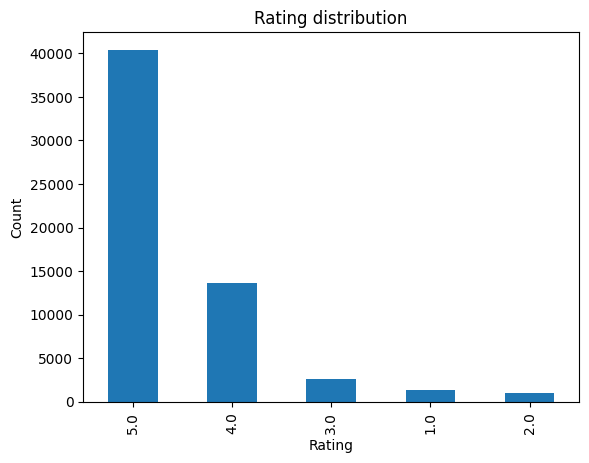

In [18]:
# plot the distribution of ratings to get an idea of review distribution
print(data_clean["reviews.rating"].value_counts().sort_index(ascending=False))
data_clean['reviews.rating'].value_counts().plot(kind='bar')
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The rating distribution is very unbalanced, with multiple 4-5 star comments and very few 1-2 star comments.

## Preprocess Dataset

In [19]:
data_processed = data_clean.copy().reset_index(drop=True)

In [20]:
# Concatenate all review information into one column like this:
# Excellent value (reviews.title)
# I bought this as a book reader blablabla. (reviews.text)
# I recommend this product. (doRecommend)

def format_review(row):
    base_review = f"{row['reviews.title']}\n{row['reviews.text']}"

    # add recommendation information if it matches the rating
    if row['reviews.doRecommend'] == 'true' and row['reviews.rating'] >= 3.0:
        base_review += "\nI recommend this product."
    elif row['reviews.doRecommend'] =='false' and row['reviews.rating'] <= 3.0:
        base_review += "\nI don't recommend this product."
    
    return base_review

# apply format_review to each row
data_processed['review'] = data_clean.progress_apply(format_review, axis=1)

# drop columns that are not needed anymore
# let's keep the rating, to compare with our classifier predictions later
data_processed.drop(columns=['reviews.doRecommend', 'reviews.text', 'reviews.title'], inplace=True)


100%|██████████| 59046/59046 [00:00<00:00, 74709.53it/s]


In [21]:
# Let's make sure we dont have any nan values as review
rows_no_review = data_processed['review'].isna().sum()
print('Number of rows with no review information:', rows_no_review)

# drop rows with no review information
data_processed = data_processed.dropna(subset=['review'])
print(rows_no_review, 'rows dropped')

# check for remaining nan values
data_processed.isnull().sum()

Number of rows with no review information: 8937
8937 rows dropped


name              0
brand             0
categories        0
reviews.rating    0
review            0
dtype: int64

## Print final dataset shape

In [22]:
print(data_processed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50109 entries, 0 to 59045
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            50109 non-null  object 
 1   brand           50109 non-null  object 
 2   categories      50109 non-null  object 
 3   reviews.rating  50109 non-null  float64
 4   review          50109 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.3+ MB
None


In [23]:
print_random_product_sheet(data_processed)

----------------------------------------------------------------------------------------------------
[name] Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers
----------------------------------------------------------------------------------------------------
[brand] Amazon
----------------------------------------------------------------------------------------------------
[categories] Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Computers & Tablets,Tablets & eBook Readers
----------------------------------------------------------------------------------------------------
[reviews.rating] 5.0
----------------------------------------------------------------------------------------------------
[review] Great tablet
I think this is a great tablet. I bought 3 of them. You can't beat this for the price.


## Pickle processed dataset

In [24]:
data_processed.to_pickle('pickle/data_processed.pkl')